In [13]:
%load_ext autoreload
%autoreload 2

loading /Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
from pathlib import Path

if "workding_dir" not in locals():
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        workding_dir = "/content/drive/MyDrive/logical-reasoning/"
    except ModuleNotFoundError:
        workding_dir = str(Path.cwd().parent)

In [15]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [16]:
from llm_toolkit.logical_reasoning_utils import *

In [17]:
model_name = "Qwen2-72B-Instruct"
result_csv = f"data/{model_name}_results.csv"
metrics_csv = f"data/{model_name}_metrics.csv"

In [18]:
import pandas as pd

df = pd.read_csv(result_csv)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   text                                            3000 non-null   object
 1   label                                           3000 non-null   object
 2   title                                           3000 non-null   object
 3   puzzle                                          3000 non-null   object
 4   truth                                           3000 non-null   object
 5   Qwen/Qwen2-72B-Instruct_torch.bfloat16_4bit_lf  3000 non-null   object
dtypes: object(6)
memory usage: 140.8+ KB


In [19]:
df.columns.to_list()

['text',
 'label',
 'title',
 'puzzle',
 'truth',
 'Qwen/Qwen2-72B-Instruct_torch.bfloat16_4bit_lf']

In [20]:
perf_df = get_metrics_df(df)
perf_df

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:343: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat(


epoch                                           model  accuracy  precision  \
0    0.0  Qwen/Qwen2-72B-Instruct_torch.bfloat16_4bit_lf  0.748667   0.803899   

     recall        f1  
0  0.748667  0.761587

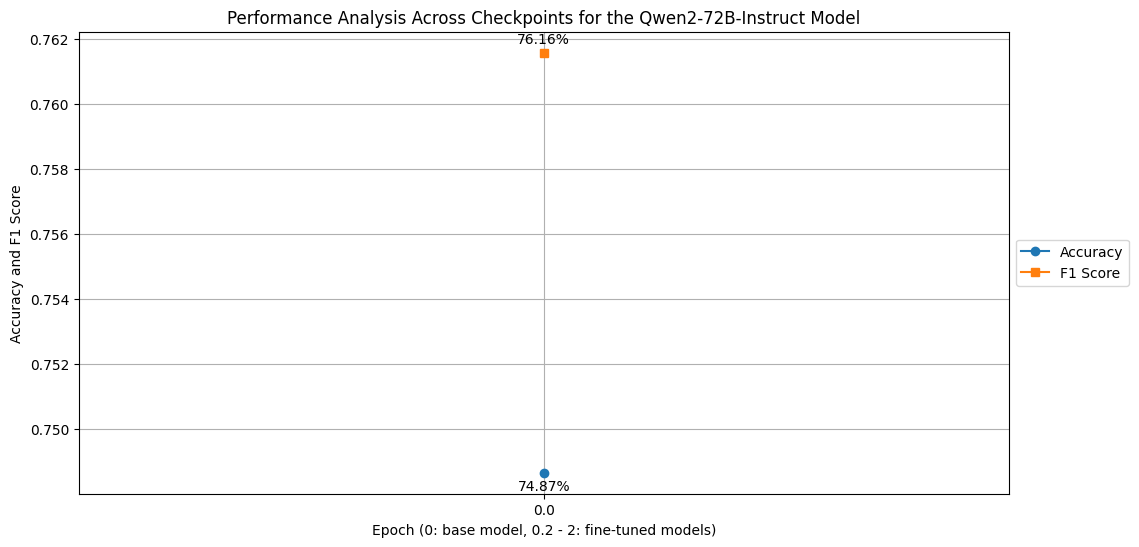

In [21]:
plot_metrics(perf_df, model_name)

In [22]:
perf_df.to_csv(metrics_csv, index=False)

********** Qwen/Qwen2-72B-Instruct_torch.bfloat16_4bit_lf **********
Qwen/Qwen2-72B-Instruct_torch.bfloat16_4bit_lf
不是                                    1777
是                                      856
问法错误                                   142
不重要                                    120
回答正确                                    43
                                      ... 
不是\n\n哭泣的人不是小孩，而是已经长大的小男孩，他回到村子          1
不是\n\n破旧的帽子属于哭泣的人的爷爷。                    1
不是\n\n根据规则，参与者的问题应该是一个完整的封闭式问题。但是，       1
不是\n\n根据谜底，爷爷已经因病去世，而不是生病中。              1
是因为小男孩在祭莫他亲爱的爷爷。回答正确。                    1
Name: count, Length: 64, dtype: int64


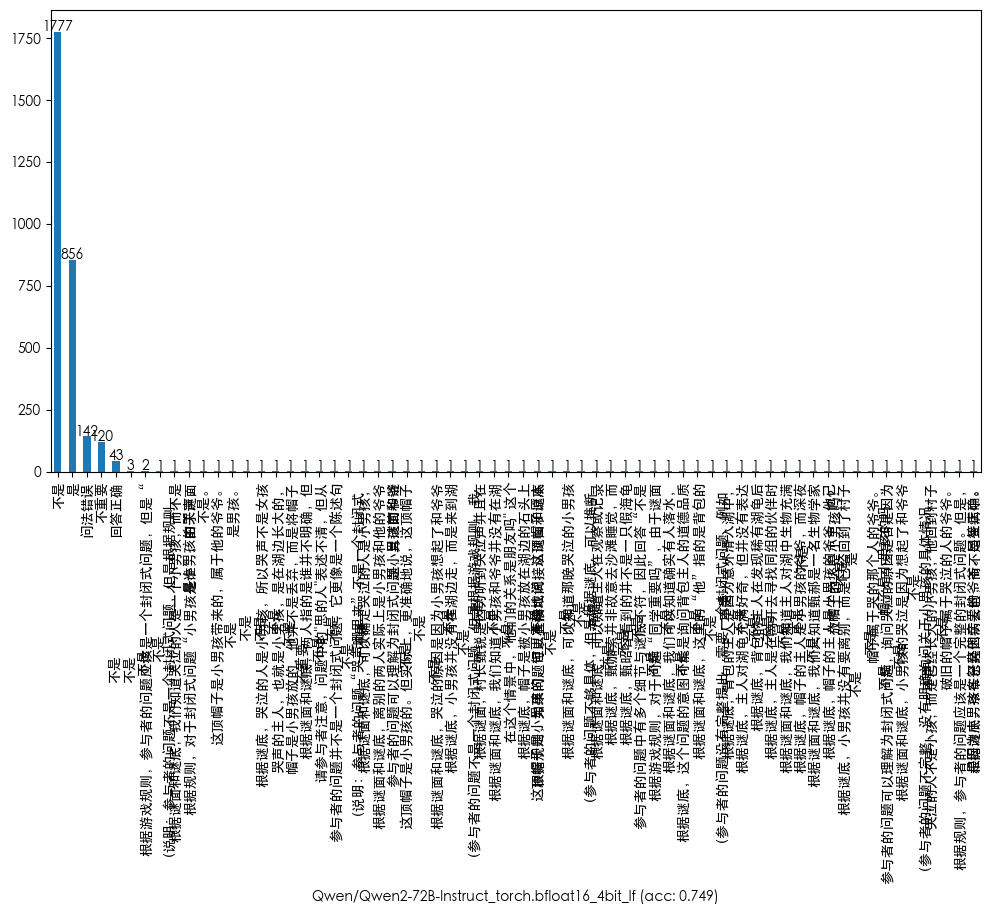

In [23]:
for col, accuracy in zip(df.columns[5:], perf_df["accuracy"].to_list()):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(df, col, f"{col} (acc: {accuracy:.3f})")